In [66]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [67]:
x, y = make_regression(n_features=1, n_informative=1)
noise = 40*np.random.rand(100)
y = y + noise


In [68]:
#x = x.reshape(100,1)
print(x.shape)
y = y.reshape(100,1)
print(y.shape)

(100, 1)
(100, 1)


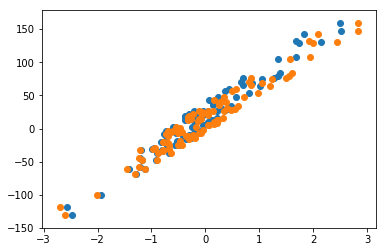

In [69]:
plt.scatter(x,y)
X = (x-x.mean())/x.std()
Y = y
plt.scatter(X,Y)
plt.show()

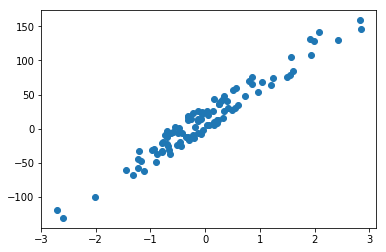

In [70]:
plt.scatter(X,Y)
plt.show()

In [71]:
def hypothesis(x, theta):
    return (theta[0] + theta[1]*x)

def error(X, Y, theta):
    m = X.shape[0]
    error = 0
    for i in range(m):
        hx = hypothesis(x[i], theta)
        error += (hx-y[i])**2
        
    return error

def gradient(X, Y, theta):
    grad = np.zeros((2,))
    m = X.shape[0]
    for i in range(m):
        hx = hypothesis(X[i], theta)
        grad[0] += (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
        
    return grad

def gradient_descent(X, Y, learning_rate = 0.001):
    theta = np.zeros((2,))
    itr = 0
    error_list = []
    theta_list = []
    while(itr<=100):
        grad = gradient(X, Y, theta)
        e = error(X, Y, theta)
        error_list.append(e)
        theta_list.append((theta[0], theta[1]))
        theta[0] -= learning_rate*grad[0]
        theta[1] -= learning_rate*grad[1]
        itr = itr + 1
        
    return theta, error_list, theta_list

In [72]:
final_theta, error_list, theta_list = gradient_descent(X, Y)

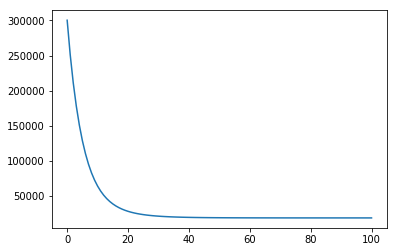

In [73]:
plt.plot(error_list)
plt.show()

In [74]:
 print(final_theta)

[14.1285173  51.51508566]


In [75]:
xtest = np.linspace(-2, 2, 10)
print(xtest)

[-2.         -1.55555556 -1.11111111 -0.66666667 -0.22222222  0.22222222
  0.66666667  1.11111111  1.55555556  2.        ]


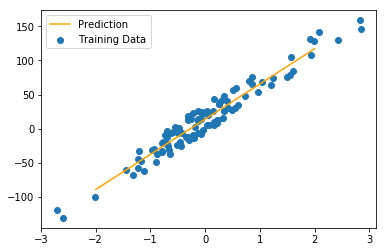

In [76]:
plt.scatter(X,Y, label='Training Data')
plt.plot(xtest, hypothesis(xtest, final_theta), color='orange', label='Prediction')
plt.legend()
plt.show()

# Visualising

In [77]:
print(X.shape)

(100, 1)


In [78]:
T0 = np.arange(-2, 3, 0.01)
T1 = np.arange(-2, 3, 0.01)
T0, T1 = np.meshgrid(T0, T1)

J = np.zeros(T0.shape)

m = T0.shape[0]
n = T1.shape[1]

for i in range(m):
    for j in range(n):
        J[i,j] = np.sum((Y - T1[i,j]*X - T0[i,j])**2)



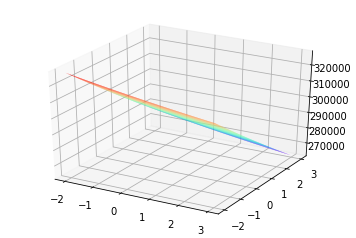

In [79]:
fig = plt.figure()
axes = fig.gca(projection='3d')

axes.plot_surface(T0, T1, J, cmap='rainbow')
plt.show()

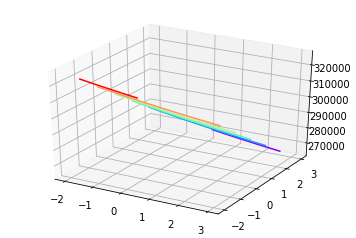

In [80]:
fig = plt.figure()
axes = fig.gca(projection='3d')

axes.contour(T0, T1, J, cmap='rainbow')
plt.show()

ValueError: Contour levels must be increasing

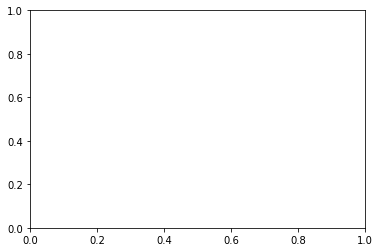

In [58]:
plt.contour(T0, T1)
plt.show()